# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [1]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [2]:
# Neuer Datensatz
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\dataset_custom.csv')

In [3]:
# Erstellung einer Zielvariablen-Spalte aus den Raucher-Features (Zusammenführen):

def create_raucher_ziel(row):
    if row['Raucher_nie'] == 1:
        return 1
    elif row['Raucher_ehem'] == 1:
        return 2
    elif row['Raucher_aktiv'] == 1:
        return 3
    else:
        return None  # Oder einen Standardwert, je nach Anforderungen

# Neue Zielspalte erstellen:

dataset['Raucher_Ziel'] = dataset.apply(create_raucher_ziel, axis=1)

data = dataset.drop(columns=['Raucher_nie', 'Raucher_ehem', 'Raucher_aktiv'])

# Anforderungen 6: Klassifikation

Führen Sie mit dem Algorithmus Ihrer Wahl eine Klassifikationsaufgabe auf Ihren Daten durch.

Teilen Sie dazu zunächst die Daten auf, um Overfitting beim Trainieren des Algorithmus und bei der Parameterauswahl zu vermeiden. Erklären Sie die gewählte Strategie und die Größenverhältnisse.

In [5]:
# Teilen der Daten mithilfe der "train_test_split"-Funktion, da der Datensatz nach Alter sortiert ist 
# und er so in random Trainings- und Testdatensätze zerteilt wird. 
# Somit wird eine Durchmischung der Daten gewährleistet.

# Aufgrund eines ausreicehnd großen Datensatzes wird erstmal keine Aufteilung nach CrossValidation (CV) benötigt.
# Außerdem ist CV rechenintensiver. Um anfänglich schneller auf Ergebniss zu kommen, wird darauf verzichtet.
# Bei nicht zufriedenstellenden Ergebnissen, würde dann jedoch rückwirkend auf CV zurückgergiffen werden.

# Da genügend Daten im Datensatz vorhanden sind (rund 1 mio. Zeilen), können wir die Trainingsdaten auf 20 % des Gesamtumfangs festlegen.

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Raucher_Ziel']), data['Raucher_Ziel'], test_size=0.2, random_state=42)

X_train

,Unnamed: 0,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,...,SGOT_ALT,gamma_GTP,Body-Mass-Index,BD_optimal,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3,Trinker
113922,113928,0,55,170,75,89.0,94.0,274.0,44.0,191.0,...,29.0,33.0,25.95,1,0,0,0,0,0,1
511548,511574,1,45,155,50,76.0,87.0,182.0,41.0,126.0,...,10.0,11.0,20.81,1,0,0,0,0,0,0
880869,880921,1,55,150,55,88.8,82.0,240.0,63.0,161.0,...,34.0,27.0,24.44,0,0,0,1,0,0,0
818187,818234,1,20,150,50,67.5,92.0,208.0,62.0,129.0,...,10.0,16.0,22.22,0,1,0,0,0,0,1
109157,109163,0,30,165,60,82.0,85.0,199.0,61.0,101.0,...,21.0,21.0,22.04,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,259197,1,45,160,50,74.0,86.0,192.0,57.0,111.0,...,12.0,9.0,19.53,1,0,0,0,0,0,0
365838,365861,1,40,155,65,86.0,101.0,241.0,73.0,149.0,...,12.0,12.0,27.06,0,1,0,0,0,0,0
131932,131941,1,35,155,60,83.0,84.0,233.0,62.0,134.0,...,20.0,21.0,24.97,0,0,1,0,0,0,0
671155,671195,0,70,170,80,92.0,91.0,131.0,66.0,59.0,...,24.0,23.0,27.68,0,0,0,1,0,0,0


In [6]:
# Überprüfung der Altersverteilung der Trainingsdaten:

print(X_train['Alter'].min(), X_train['Alter'].max())


# Überprüfung der Altersverteilung der Testdaten:

print(X_test['Alter'].min(), X_test['Alter'].max())

20 85
20 85


In [7]:
# Überprüfung der Größe der Trainingsdaten:

print(len(X_train['Alter']))


# Überprüfung der Größe der Testdaten:

print(len(X_test['Alter']))

793031
198258


In [7]:
# Hier zeigt sich, dass die Trainingsdaten etwa 20 % des Gesamtdatensatzes entsprechen. 

Wählen Sie geeignete Features aus und setzen Sie die Parameter des Algorithmus. Beschreiben Sie das gewälhte Vorgehen für die Auswahl der Features und Parameter. Berichten Sie den Parameterraum und die final gewählten Parameter. Geben Sie die Performanz auf den Trainingsdaten (bzw. Entwicklungsdaten, falls verwendet) an.

In [8]:
# Ansatz: Wir wählen die Features durch eine logitische Regression (Korrelation) und mit Hilfe der SelectFromModel-Klasse 
# der feature_selection Library aus, um jeweils unterschiedliche Ansätze versuchen zu können.

In [9]:
# Regressionsverfahren:

# softmax_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', max_iter=1000)
# softmax_model.fit(X_train, y_train)

In [10]:
# Speichern:

# joblib.dump(softmax_model, 'Modelle/softmax_model_1_A6.joblib')

# Laden:

loaded_softmax_model = joblib.load('Modelle/softmax_model_1_A6.joblib')

c:\Users\SebastianGrab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
# SelectFromModel Ansatz:

# feature_selection = SelectFromModel(loaded_softmax_model, threshold='mean')
# feature_selection.fit(X_train, y_train)

# feature_selection.feature_names_in_

# feature_selection.get_feature_names_out()

# print(feature_selection)

In [12]:
# Speichern:

# joblib.dump(feature_selection, 'Modelle/feature_selection_A6.joblib')


# Laden:

loaded_feature_model = joblib.load('Modelle/feature_selection_A6.joblib')


# Parameter ausgeben:

print('Feature_names_out: ' + str(loaded_feature_model.get_feature_names_out()))

print('Feature_names_in: ' + str(loaded_feature_model.feature_names_in_))

print('Model: ' + str(loaded_feature_model))

Feature_names_out: ['Alter' 'Gewicht' 'Nüchterner Blutzucker' 'Totale Cholesterin'
 'HDL_Cholesterin' 'LDL_Cholesterin' 'Triglycerid' 'SGOT_ALT' 'gamma_GTP']
Feature_names_in: ['Unnamed: 0' 'Geschlecht' 'Alter' 'Größe' 'Gewicht' 'Hüftumfang'
 'Nüchterner Blutzucker' 'Totale Cholesterin' 'HDL_Cholesterin'
 'LDL_Cholesterin' 'Triglycerid' 'Hämoglobin' 'SGOT_AST' 'SGOT_ALT'
 'gamma_GTP' 'Body-Mass-Index' 'BD_optimal' 'BD_normal'
 'BD_Grenzwert_normal' 'BD_Hypertonie Grad 1' 'BD_Hypertonie Grad 2'
 'BD_Hypertonie Grad 3' 'Trinker']
Model: SelectFromModel(estimator=LogisticRegression(max_iter=1000,
                                             multi_class='multinomial',
                                             penalty='l1', solver='saga'),
                threshold='mean')


c:\Users\SebastianGrab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\SebastianGrab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SelectFromModel from version 1.2.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [13]:
X_train_selected = loaded_feature_model.transform(X_train)
X_test_selected = loaded_feature_model.transform(X_test)

In [ ]:
# Untersuchung der Korrelation aller Features in einer Heatmap:

plt.figure(figsize=(24, 24))
heatmap = sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

plt.title('Heatmap über alle Features')
plt.show()

# Auswahl aller Features, die mit 'Raucher_Ziel' stärker korrelieren als 0,2 bzw. -0,2:

# 'Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker'

In [14]:
# Features Selektieren nach den Ausgaben des Select-Models und der Regression/Korrelation:

# Select-Model: 
sf_model = X_train[['Alter', 'Gewicht', 'Nüchterner Blutzucker', 'Totale Cholesterin',
       'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'SGOT_ALT',
       'gamma_GTP']]


sf_model_test = X_test[['Alter', 'Gewicht', 'Nüchterner Blutzucker', 'Totale Cholesterin',
       'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'SGOT_ALT',
       'gamma_GTP']]



# Corr Model 1:
sf_corr = X_train[['Geschlecht', 'Alter', 'Größe', 
                   'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]

sf_corr_test = X_test[['Geschlecht', 'Alter', 'Größe', 
                       'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]

# Corr Model 2:
sf_corr2 = X_train[['Geschlecht', 'Alter', 'Gewicht',
       'HDL_Cholesterin', 'Triglycerid',
       'gamma_GTP', 'Hämoglobin', 'Trinker']]


sf_corr2_test = X_test[['Geschlecht', 'Alter', 'Gewicht',
       'HDL_Cholesterin', 'Triglycerid',
       'gamma_GTP', 'Hämoglobin', 'Trinker']]

# Corr Model 3:
sf_corr3 = X_train[['Geschlecht', 'Alter', 'Gewicht', 
                    'HDL_Cholesterin', 'Triglycerid', 
                    'gamma_GTP', 'Hämoglobin', 'Trinker']]

sf_corr3_test = X_test[['Geschlecht', 'Alter', 'Gewicht', 
                        'HDL_Cholesterin', 'Triglycerid', 
                        'gamma_GTP', 'Hämoglobin', 'Trinker']]

In [ ]:
# Der Datensatz konnte auf die für die Klassifikation als relevant bestimmten Features limitiert werden. Dies war nötig, 
# da die Trainingszeit für mehrere Verfahren ansonsten zu lange gewesen wäre. 

Evaluieren Sie die Klassifikation auf den ungesehenen Testdaten. Betrachten Sie Precision und Recall sowie den F-Wert. Welches Maß ist für Ihre Anwendung wichtiger? Bewerten Sie Ihr Ergebnis. Ist es in der Praxis voraussichtlich zufriedenstellend?

In [15]:
# Erstes Modell:

# Der multi_class - Wert wird als multinomial festgelegt, da wir mehr als 2 Zielklassen haben.
# Der Solver "saga" wird für multinomiale lineare Regressionen empfohlen und ist für große Datasets geeignet.
# (Nach der Scikit Dokumentation ist saga oftmals der beste Solver)
# Hierfür verwenden wir zunächst einen max_iterator von 1000:

loaded_softmax_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
loaded_softmax_model.fit(sf_model, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

Accuracy: 0.64


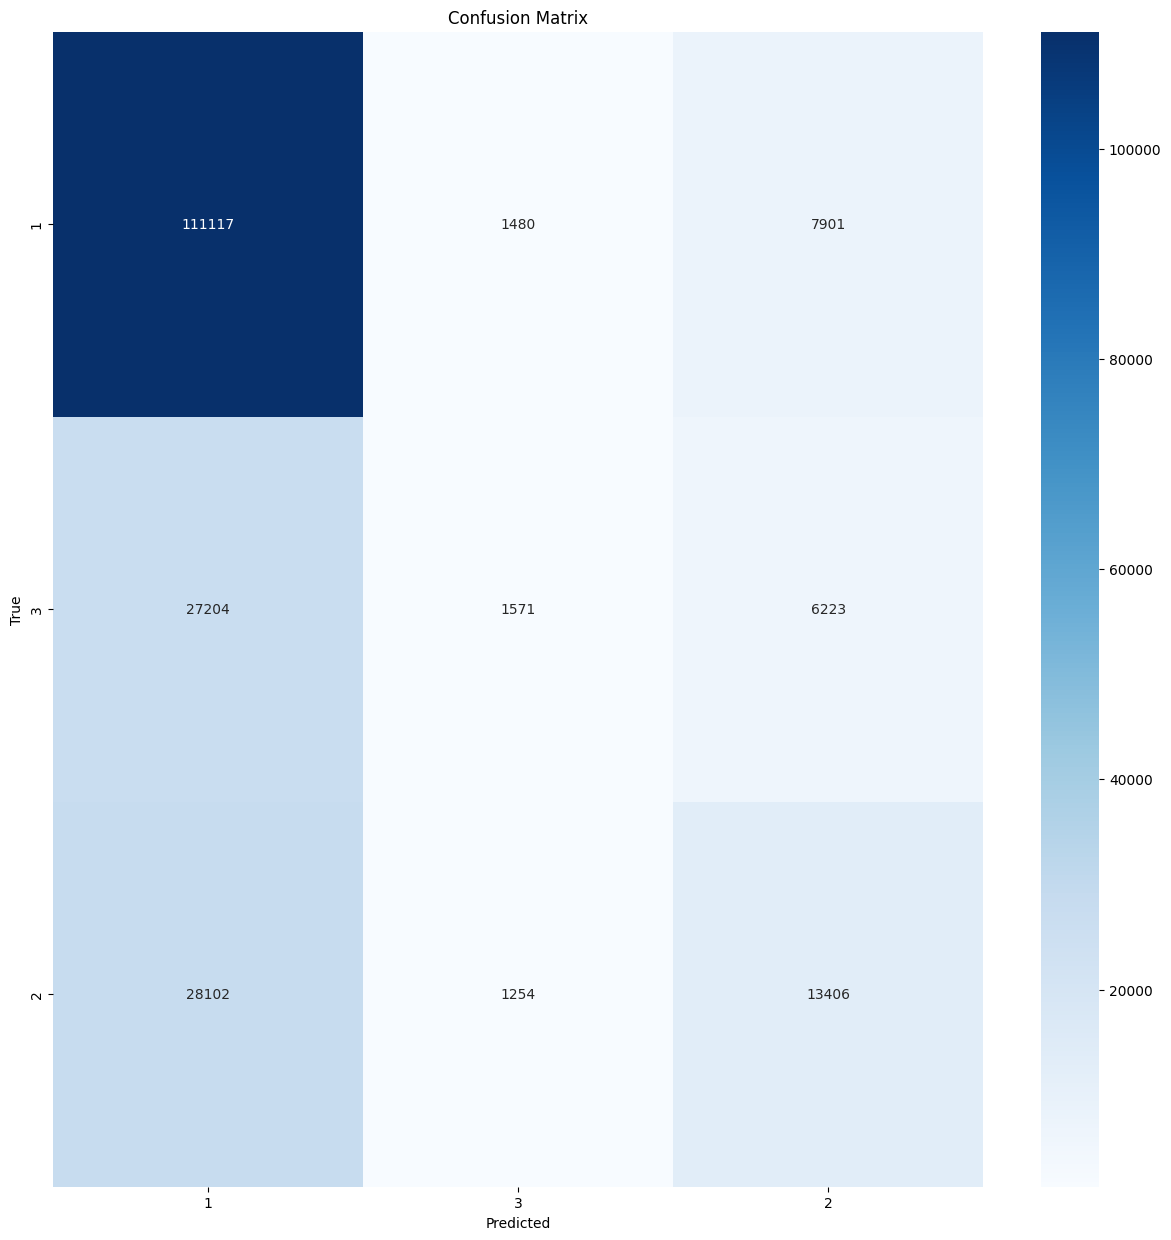

In [24]:
# Vorhersagen auf dem Testset machen (nur für die selektierten Features)

y_pred_model = loaded_softmax_model.predict(sf_model_test)

# Validierung
accuracy = accuracy_score(y_test, y_pred_model)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix erstellen und anzeigen
cm = confusion_matrix(y_test, y_pred_model)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Raucher_Ziel'].unique() , yticklabels=data['Raucher_Ziel'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Precision berechnen:

precision = precision_score(y_test, y_pred_model, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall berechnen:

recall = recall_score(y_test, y_pred_model, average='weighted')
print(f'Recall weighted: {recall:.2f}')

# F1 Score berechnen:

f1 = f1_score(y_test, y_pred_model, average='weighted')
print(f'F1 score: {f1:.2f}')

Precision: 0.58
Recall weighted: 0.64
F1 score: 0.57


In [ ]:
# Die Precision der Klassifikation basierend auf den Features der SelectModel-Klassen Methode liegt lediglich bei 0.58 
# und der Recall bei 0.64. Diese Werte wollen wir verbessern und versuchen es deshalb nun mit den Features der Regressionsauswahl.
# Auch der F1 Score mit 0.57 ist niedrig.

# In unserem Fall wäre neben der Precision vor allem auch der Recall sehr wichtig, da wir mit den Nichtrauchern eine sehr 
# große Klassifikationsklasse haben.

In [21]:
# Zweites Modell mit anderen Features (Regressions-/Korrelationsselektion) und dem selben max_iterator Wert:

softmax_model_corr = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
softmax_model_corr.fit(sf_corr, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

Accuracy: 0.67


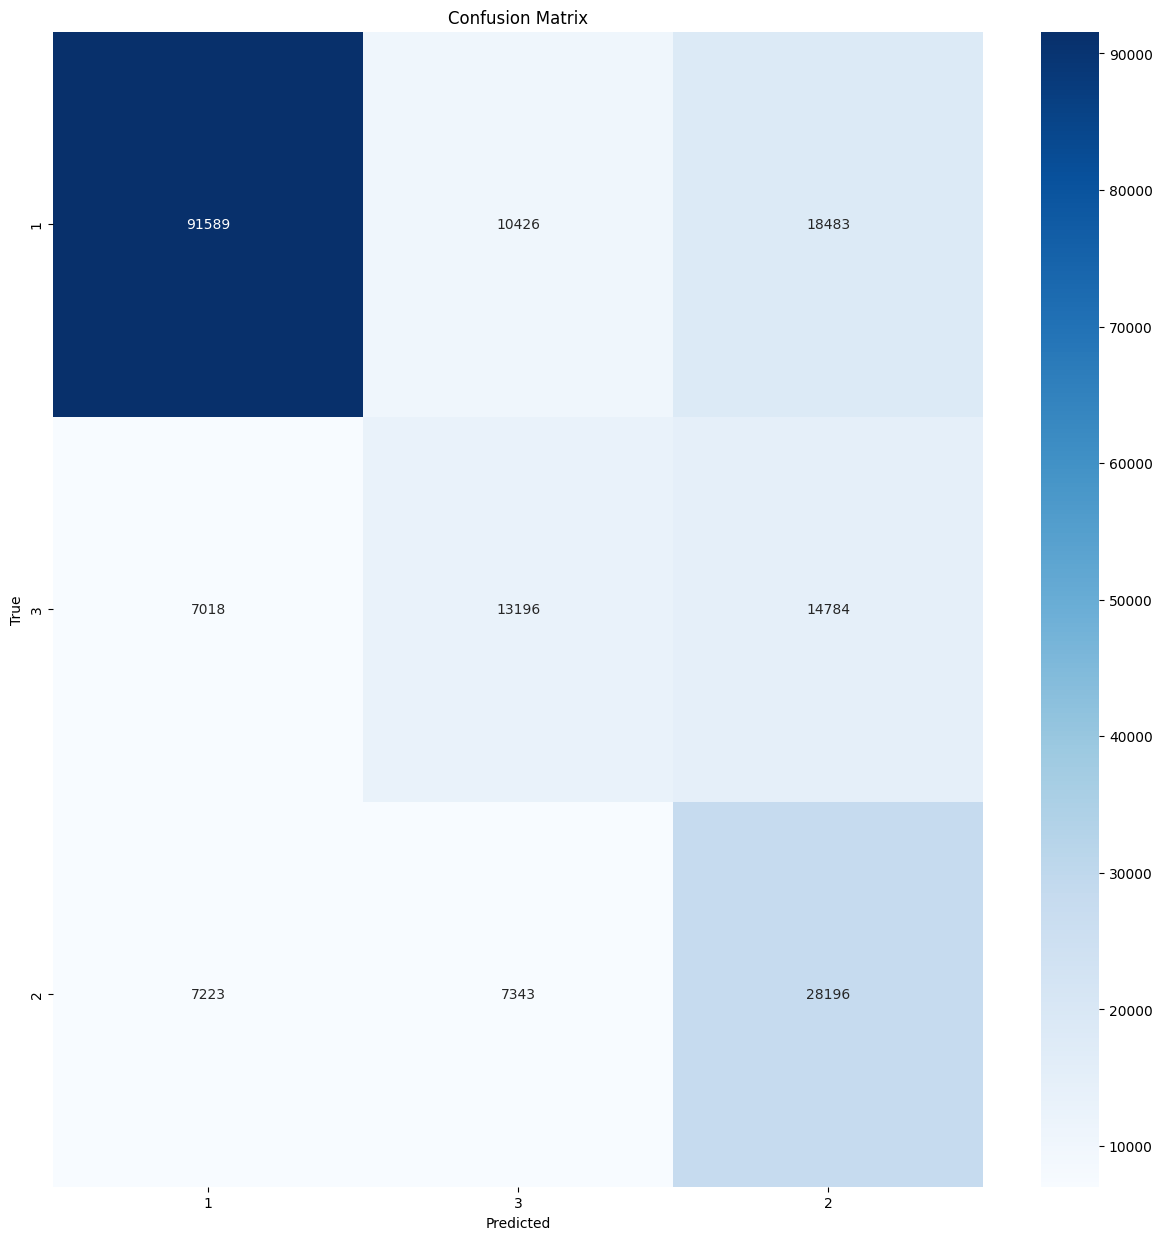

In [26]:
# Vorhersagen auf dem Testset machen (nur für die selektierten Features):

y_pred_corr = softmax_model_corr.predict(sf_corr_test)

# Validierung
accuracy = accuracy_score(y_test, y_pred_corr)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix erstellen und anzeigen
cm = confusion_matrix(y_test, y_pred_corr)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Raucher_Ziel'].unique() , yticklabels=data['Raucher_Ziel'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Precision berechnen:

precision = precision_score(y_test, y_pred_corr, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall berechnen:

recall = recall_score(y_test, y_pred_corr, average='weighted')  # Du kannst 'micro', 'macro', oder 'weighted' auswählen
print(f'Recall: {recall:.2f}')

# F1 Score berechnen:

f1 = f1_score(y_test, y_pred_model, average='weighted')
print(f'F1 score: {f1:.2f}')

Precision: 0.70
Recall: 0.67
F1 score: 0.57


In [20]:
# Versuch das dritte Modell zu trainieren (mit mehr Iterationen):
# Hier ist die Feature-Zusammensetzung aber komplexer als zuvor deshalb kein echtes Ergebnis.


# softmax_model_corr_2 = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000)
# softmax_model_corr_2.fit(sf_corr2, y_train)

c:\Users\SebastianGrab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial', solver='saga')

In [ ]:
# Eine weitere Feature-Selektion aus dem korrelierenden und SelectedFeature-Alg mit einem max_iterator = 2000 dauert ungewöhnlich lange 
# zu trainieren, weshalb wir diese auslassen und es erneut mit 1500 Iterationen versuchen.

In [ ]:
softmax_model_corr_3 = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1500)
softmax_model_corr_3.fit(sf_corr3, y_train)

In [ ]:
# Vorhersagen auf dem Testdatensatz machen (nur für die selektierten Features):

y_pred_corr_3 = softmax_model_corr_3.predict(sf_corr3_test)

# Validierung
accuracy_3 = accuracy_score(y_test, y_pred_corr_3)
print(f'Accuracy: {accuracy_3:.2f}')

# Confusion Matrix erstellen und anzeigen
cm = confusion_matrix(y_test, y_pred_corr_3)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Raucher_Ziel'].unique() , yticklabels=data['Raucher_Ziel'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Korrelierenden Features führen zu einem besseren Ergebnis.

# Dennoch ist eine Precision von 70 % nicht sehr hoch. Deshalb werden wir zudem ein resampling der Daten durchführen, sodass die
# Klassen etwa gleich verteilt sind. Das Ziel ist es, eine höhere Precision zu erreichen.

# Es muss jedoch auch gesagt werden, dass es von den gesundheitlichen Faktoren schwer ist, Raucher von ehemaligen 
# Rauchern zu unterscheiden. Für die Versicherung ist dies jedoch nur sekundär, da ehemalige Raucher auch anfälliger für
# Raucherkrankheiten sind.

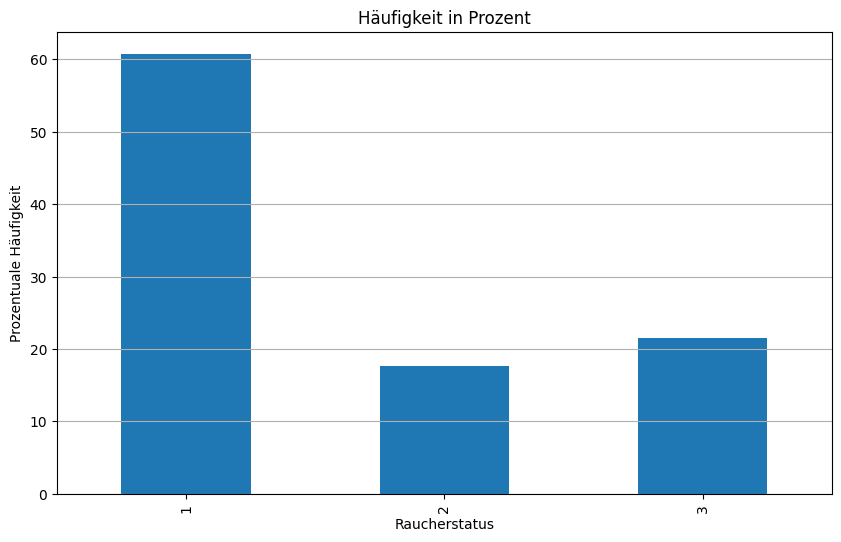

In [4]:
# Berechne relative Häufigkeit der Zielwerte in Prozent 

frequency = (dataset['Raucher_Ziel'].sort_values().value_counts(sort=False) / len(dataset)) * 100 

# Balkendiagramm über die Verteilung 

plt.figure(figsize=(10, 6)) 
frequency.plot(kind='bar') 
plt.xlabel('Raucherstatus') 
plt.ylabel('Prozentuale Häufigkeit') 
plt.title('Häufigkeit in Prozent') 
plt.grid(axis='y') 
plt.show()

Random under-sampling:
Raucher_Ziel
1    388903
2    388903
Name: count, dtype: int64


<Axes: title={'center': 'Anzahl je Raucher_Ziel'}, xlabel='Raucher_Ziel'>

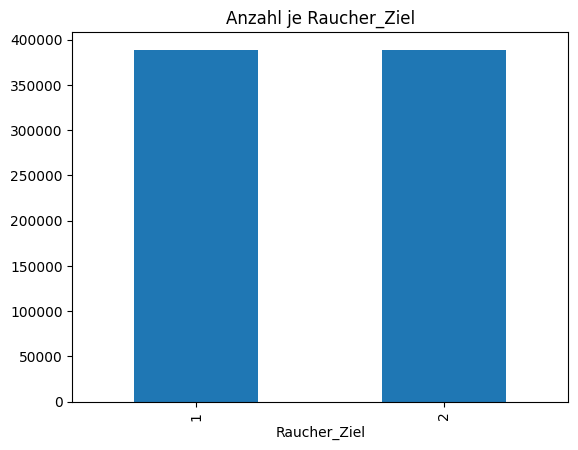

In [5]:
# Ein Resampling der Daten könnte das Ergebnis verbessern. 

# In diesem Fall verwenden wir Undersampling, da wir bereits einen großen Datensatz haben. 
# Bei Oversampling würde zudem das Rauschen verstärkt werden.

# Zudem legen wir die Raucherstati 2 (ehem. Raucher) und 3 (aktive Raucher) zusammen, da sie aus der gesundheitlichen Perspektive starke Gemeinsamkeiten aufweisen, 
# wie es auch die bisherigen Klassifikationsverfahren gezeigt haben.

# Quelle: https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets

data['Raucher_Ziel'] = data['Raucher_Ziel'].replace(3,2)

count_class_0, count_class_1 = data['Raucher_Ziel'].sort_values().value_counts()

# Aufteilen in Zielklassen

class_0 = data[data['Raucher_Ziel'] == 1]
class_1 = data[data['Raucher_Ziel'] == 2]


class_0_under = class_0.sample(count_class_1)
data_under = pd.concat([class_0_under, class_1], axis=0)

print('Random under-sampling:')
print(data_under['Raucher_Ziel'].value_counts())

data_under['Raucher_Ziel'].value_counts().plot(kind='bar', title='Anzahl je Raucher_Ziel')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_under.drop(columns=['Raucher_Ziel']), data_under['Raucher_Ziel'], test_size=0.2, random_state=42)

X_train

,Unnamed: 0,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,...,SGOT_ALT,gamma_GTP,Body-Mass-Index,BD_optimal,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3,Trinker
846928,846978,0,40,170,65,81.0,90.0,196.0,67.0,98.0,...,12.0,16.0,22.49,0,1,0,0,0,0,1
917163,917216,0,50,170,85,97.1,144.0,122.0,47.0,58.0,...,34.0,26.0,29.41,1,0,0,0,0,0,0
763619,763662,0,65,165,60,80.0,120.0,275.0,61.0,186.0,...,25.0,57.0,22.04,0,1,0,0,0,0,0
660651,660690,0,40,180,80,83.0,102.0,250.0,46.0,137.0,...,33.0,27.0,24.69,1,0,0,0,0,0,0
6939,6939,1,40,150,60,73.0,86.0,207.0,55.0,134.0,...,8.0,14.0,26.67,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438524,438549,1,45,155,75,89.0,86.0,173.0,41.0,89.0,...,38.0,23.0,31.22,1,0,0,0,0,0,0
709857,709899,1,60,155,55,79.0,127.0,203.0,58.0,134.0,...,26.0,17.0,22.89,0,1,0,0,0,0,0
272733,272752,0,20,170,75,85.0,88.0,208.0,43.0,138.0,...,21.0,19.0,25.95,1,0,0,0,0,0,0
719149,719191,0,55,165,65,78.0,147.0,190.0,48.0,121.0,...,18.0,82.0,23.88,0,0,1,0,0,0,1


In [7]:
# Features auswählen:

undersampled = X_train[['Geschlecht', 'Alter', 'Größe', 
                   'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP']]

undersampled_test = X_test[['Geschlecht', 'Alter', 'Größe', 
                       'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP']]

In [9]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
softmax_model.fit(undersampled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

Accuracy: 0.83


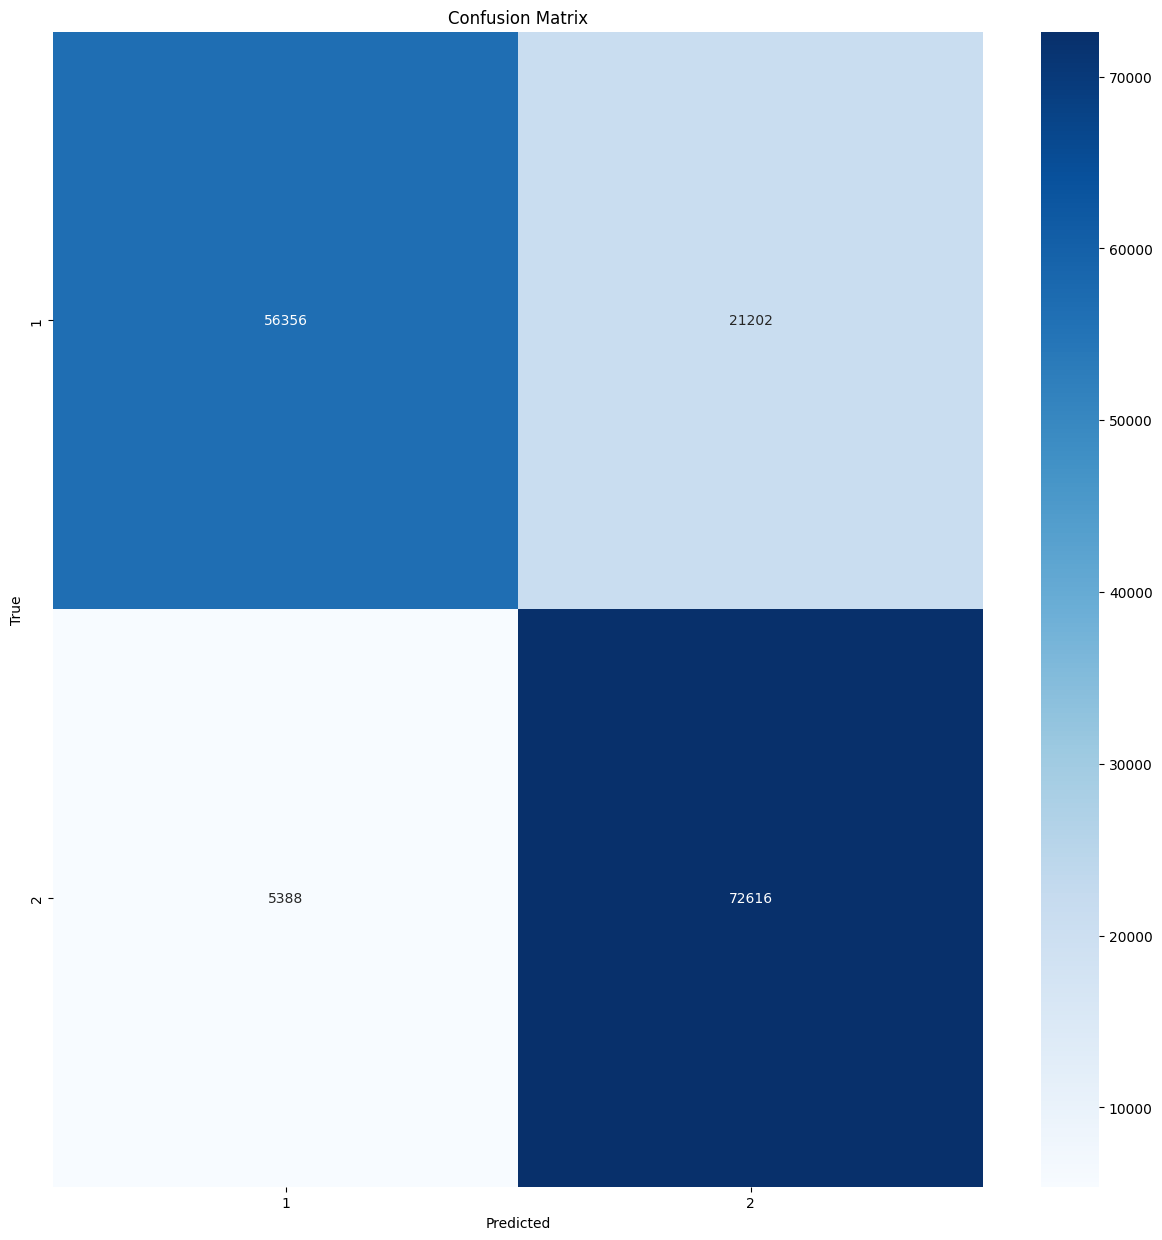

In [10]:
# Vorhersagen auf dem Testset machen (nur für die selektierten Features)

y_pred_model = softmax_model.predict(undersampled_test)

# Validierung
accuracy = accuracy_score(y_test, y_pred_model)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix erstellen und anzeigen:

cm = confusion_matrix(y_test, y_pred_model)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Raucher_Ziel'].unique() , yticklabels=data['Raucher_Ziel'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Precision berechnen:

precision = precision_score(y_test, y_pred_model, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall berechnen:

recall = recall_score(y_test, y_pred_model, average='weighted')
print(f'Recall weighted: {recall:.2f}')

# F1 Score berechnen:

f1 = f1_score(y_test, y_pred_model, average='weighted')
print(f'F1 score: {f1:.2f}')

Precision: 0.84
Recall weighted: 0.83
F1 score: 0.83


In [ ]:
# Das undersampelte Dataset gibt deutlich bessere Werte zurück als das die anderen Datensätze.

# Dieses Modell könnte also deutlich besser zur Klassifikation verwendet werden.

In [ ]:
# Wenn wir die Parameter für die Classifikation an Hand des feature_selection Algorithmusses auswählen, 
# dann sind die Ergebnisse ungenauer als durch Korrelation

# In der Praxis wären die Algorithmen der ungesampelten Datensätze nicht aussagekräftig genug, um sich alleine auf ihn zu verlassen.
# Dennoch könnte er als Indikator dienen, um entscheiden zu können, um ein Proband / eine Probandin in Bezug auf den 
# Raucherstatus lügt. 